<a href="https://colab.research.google.com/github/Subhranshu-123/assignments/blob/main/BIKE_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bike=pd.read_csv("day.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
len(bike)

730

In [ ]:
## check the shape of data set
bike.shape

(730, 16)

In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
## check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
## check the missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
## checking is there any duplicated values in data set
bike_dup = bike.duplicated()
bike_dup

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [ ]:
## droping the duplicated values in data set
bike_dup = bike_dup.drop_duplicates()
bike_dup

0    False
dtype: bool

# Exploratory Data Analysis(EDA)

## Data Cleaning
- Checking the value counts for entire data set
- This will be hepl to identify any unknown/junk values present in the data set

In [ ]:
bike['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [ ]:
bike["hum"].value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [ ]:
bike["instant"].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [ ]:
bike["registered"].value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

In [ ]:
bike["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64

In [ ]:
bike["dteday"].value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

In [ ]:
bike["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [ ]:
bike["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [ ]:
bike["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [ ]:
bike["weekday"].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [ ]:
 bike["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [ ]:
bike["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
bike["temp"].value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [ ]:
bike["atemp"].value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [ ]:
bike["windspeed"].value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [ ]:
bike["casual"].value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [ ]:
bike["registered"].value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

In [ ]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
## remove unwanted columns in dat set
bike=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [ ]:
bike.info() , bike.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


(None, (730, 12))

## Dummy Variables
- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [ ]:
# Convert to category data type
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [ ]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [ ]:
# Create Dummy variable
# Drop original variable
# Drop first dummy variable for each set of dummies created.
bike_dummy = pd.get_dummies(bike, drop_first=False)
bike_dummy

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,1,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
bike_dummy.info() , bike_dummy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_1      730 non-null    uint8  
 9   season_2      730 non-null    uint8  
 10  season_3      730 non-null    uint8  
 11  season_4      730 non-null    uint8  
 12  mnth_1        730 non-null    uint8  
 13  mnth_2        730 non-null    uint8  
 14  mnth_3        730 non-null    uint8  
 15  mnth_4        730 non-null    uint8  
 16  mnth_5        730 non-null    uint8  
 17  mnth_6        730 non-null    uint8  
 18  mnth_7        730 non-null    

(None, (730, 34))

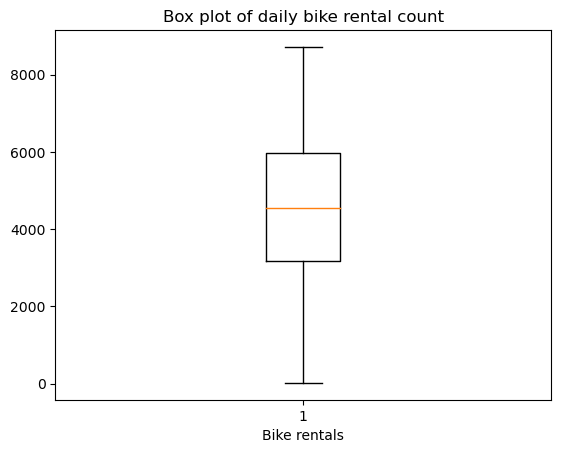

In [ ]:
## Creating a box plot of the "cnt" column
plt.boxplot(bike_dummy["cnt"])
plt.title("Box plot of daily bike rental count")
plt.xlabel("Bike rentals")
plt.show()

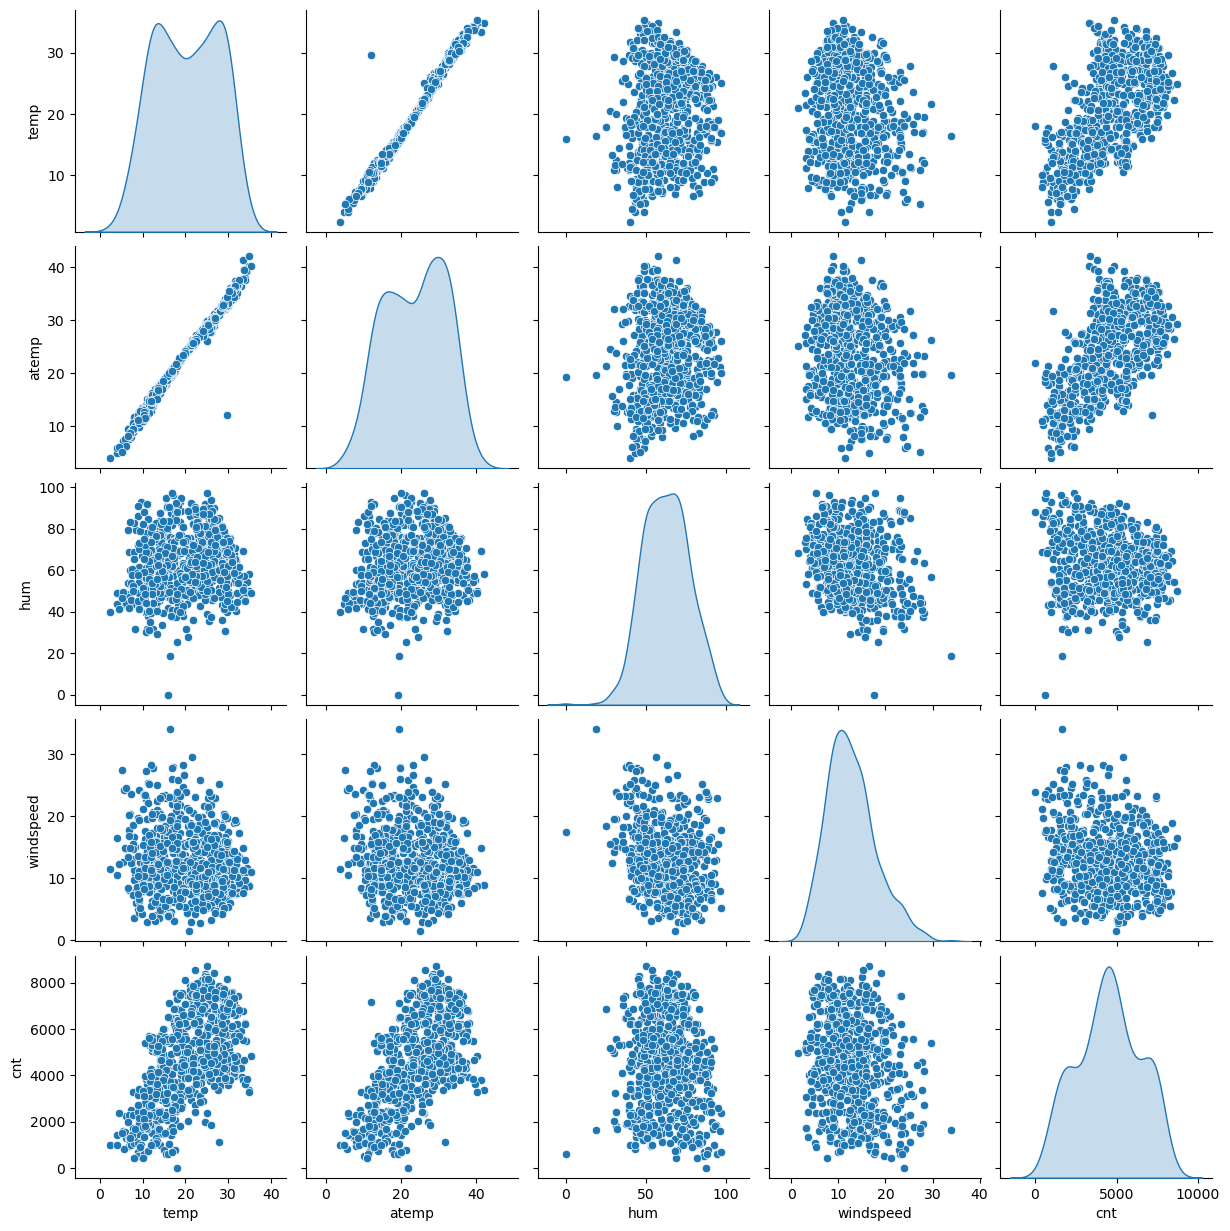

In [ ]:
pairplot=bike_dummy[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(pairplot, diag_kind='kde')
plt.show()

## Preprocessing the data
- Standardisation
- Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_dummy[num_vars] = scaler.fit_transform(bike_dummy[num_vars])
bike_dummy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [ ]:
bike_dummy.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
yr,1.000000e+00,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728,3.225068e-16,-1.751358e-17,...,-1.310791e-16,-0.003904,0.003904,-2.848931e-16,-1.642568e-17,-1.976521e-16,-6.776953e-17,0.031286,-0.005796,-0.073758
holiday,8.195345e-03,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,...,-2.325423e-02,-0.070541,0.046228,1.877683e-01,-4.670117e-02,-4.670117e-02,-4.670117e-02,0.028600,-0.018668,-0.029619
workingday,-1.185197e-02,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640,-2.250665e-02,1.340523e-02,...,-6.086821e-01,0.274469,0.232252,1.796922e-01,2.644637e-01,2.644637e-01,-6.086821e-01,0.045153,-0.061689,0.044340
temp,4.878919e-02,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044,-6.194080e-01,1.548756e-01,...,-1.217888e-02,-0.036300,-0.022016,4.621417e-03,2.298426e-02,2.722937e-02,1.589260e-02,0.114794,-0.096297,-0.058461
atemp,4.721519e-02,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685,-6.247724e-01,1.631513e-01,...,-1.200770e-02,-0.032975,-0.017836,5.041754e-03,2.526139e-02,2.644428e-02,6.275102e-03,0.113740,-0.092933,-0.064937
hum,-1.125471e-01,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,...,-3.517182e-02,-0.006715,0.025340,1.966562e-02,2.537781e-03,2.868765e-02,-3.441916e-02,-0.574367,0.490628,0.267592
windspeed,-1.162435e-02,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,...,4.782253e-03,0.021537,0.012442,-7.328425e-03,-3.228996e-02,-1.670218e-03,2.391406e-03,-0.004234,-0.037177,0.117332
cnt,5.697285e-01,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,...,3.322694e-02,-0.052581,-0.049471,-1.328226e-02,3.867215e-02,1.883803e-02,2.500442e-02,0.251010,-0.170686,-0.240602
season_1,3.225068e-16,0.034642,-0.022507,-0.619408,-0.624772,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,...,3.238560e-03,0.010049,0.010049,-5.854320e-03,-1.494720e-02,-5.854320e-03,3.238560e-03,-0.020881,0.029198,-0.022400
season_2,-1.751358e-17,-0.024408,0.013405,0.154876,0.163151,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,...,-1.928926e-03,-0.004187,-0.004187,7.097458e-03,7.097458e-03,-1.928926e-03,-1.928926e-03,-0.024246,0.040011,-0.043283


In [ ]:
# split the data into x and y
x = bike_dummy.drop(["cnt"], axis=1)
x

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.373517,0.828620,0.284606,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.360541,0.715771,0.466215,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,0.243025,0.193709,0.671380,0.675656,1,0,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,0,0.241986,0.230993,0.606684,0.274350,1,0,0,...,0,0,0,0,0,0,1,0,1,0
727,1,0,0,0.241986,0.214393,0.774208,0.210260,1,0,0,...,1,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.497001,0.676936,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
y = bike_dummy["cnt"]
y

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
725    0.240681
726    0.353543
727    0.151749
728    0.204096
729    0.311436
Name: cnt, Length: 730, dtype: float64

## Spliting the data into train and test data sets
- we will split the data into train and test(70:30 ratio) respectively

In [ ]:
## split the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [ ]:
print('Training x Shape:', x_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing x Shape:', x_test.shape)
print('Testing y Shape:', y_test.shape)

Training x Shape: (511, 33)
Training y Shape: (511,)
Testing x Shape: (219, 33)
Testing y Shape: (219,)


# Model Building

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=15,step=15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 3),
 ('holiday', False, 3),
 ('workingday', False, 3),
 ('temp', False, 3),
 ('atemp', False, 3),
 ('hum', False, 3),
 ('windspeed', False, 3),
 ('season_1', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_1', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', False, 3),
 ('mnth_4', True, 1),
 ('mnth_5', False, 3),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', False, 2),
 ('mnth_9', False, 3),
 ('mnth_10', False, 3),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_0', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_1', False, 3),
 ('weathersit_2', False, 3),
 ('weathersit_3', False, 3)]

In [ ]:
x_train.columns[rfe.support_]

Index(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_4',
       'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [ ]:
#x_train.columns
col = x_train.columns[~rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
x_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_3,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_1,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.637961,0.269229,0,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.729648,0.344872,0,0,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.685963,0.508569,0.583333,0,0,0,1,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.784062,0.342338,0,0,0,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.816195,0.091026,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0.405237,0.395131,0.542304,0.511703,0,1,0,0,0,0,0,0,1,0,0
106,0,0,1,0.495350,0.481247,0.493144,0.579511,0,0,0,0,0,0,0,0,1,0,0
270,0,0,1,0.717562,0.651183,0.872751,0.260245,0,0,0,0,0,0,1,0,0,1,0
435,1,0,1,0.507811,0.499487,0.502999,0.382050,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,211.58
4,atemp,193.99
15,weathersit_1,36.36
16,weathersit_2,27.27
17,weathersit_3,3.91
11,mnth_7,3.18
10,mnth_6,2.62
12,mnth_8,2.52
13,mnth_9,2.12
5,hum,1.96


In [ ]:
import statsmodels.api as sm

# Add a constant
x_train_lm1 = sm.add_constant(x_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, x_train_lm1).fit()

In [ ]:
# Check the parameters obtained

lr1.params

const           0.145214
yr              0.222534
holiday        -0.111889
workingday     -0.018589
temp            0.082128
atemp           0.568564
hum            -0.180379
windspeed      -0.149530
mnth_2         -0.075730
mnth_3         -0.008233
mnth_5          0.021187
mnth_6         -0.032687
mnth_7         -0.099061
mnth_8         -0.051940
mnth_9          0.064587
mnth_10         0.110769
weathersit_1    0.127781
weathersit_2    0.076772
weathersit_3   -0.059338
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          6.43e-160
Time:                        14:57:54   Log-Likelihood:                 453.45
No. Observations:                 511   AIC:                            -870.9
Df Residuals:                     493   BIC:                            -794.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1452      0.030      4.836   

# Model 2
- Removing the variable 'atemp' based on its High p-value & High VIF

In [ ]:
x_train_new2 = x_train_rfe.drop(["mnth_3"], axis = 1)
x_train_new2

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_2,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_1,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.637961,0.269229,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.404998,0.729648,0.344872,0,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.685963,0.508569,0.583333,0,0,1,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.784062,0.342338,0,0,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.816195,0.091026,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0.405237,0.395131,0.542304,0.511703,0,0,0,0,0,0,0,1,0,0
106,0,0,1,0.495350,0.481247,0.493144,0.579511,0,0,0,0,0,0,0,1,0,0
270,0,0,1,0.717562,0.651183,0.872751,0.260245,0,0,0,0,0,1,0,0,1,0
435,1,0,1,0.507811,0.499487,0.502999,0.382050,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train_new2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_2', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# VIF check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new2.columns
vif['VIF'] = [variance_inflation_factor(x_train_new2.values, i) for i in range(x_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,211.13
4,atemp,193.87
14,weathersit_1,35.89
15,weathersit_2,26.81
16,weathersit_3,3.85
10,mnth_7,3.02
9,mnth_6,2.48
11,mnth_8,2.40
12,mnth_9,2.02
5,hum,1.94


In [ ]:
# Add a constant
x_train_lm2 = sm.add_constant(x_train_new2)

# Create a first fitted model
lr2 = sm.OLS(y_train, x_train_lm2).fit()
lr2

In [ ]:
# Check the parameters obtained

lr2.params

const           0.143619
yr              0.222581
holiday        -0.111171
workingday     -0.018564
temp            0.076627
atemp           0.571592
hum            -0.178559
windspeed      -0.148728
mnth_2         -0.074629
mnth_5          0.023159
mnth_6         -0.030241
mnth_7         -0.096503
mnth_8         -0.049526
mnth_9          0.066673
mnth_10         0.112444
weathersit_1    0.127770
weathersit_2    0.076214
weathersit_3   -0.060365
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     123.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          6.20e-161
Time:                        14:57:54   Log-Likelihood:                 453.36
No. Observations:                 511   AIC:                            -872.7
Df Residuals:                     494   BIC:                            -800.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1436      0.030      4.827   

# model 3

In [ ]:
x_train_new3 = x_train_new2.drop(["temp"], axis = 1)
x_train_new3

,yr,holiday,workingday,atemp,hum,windspeed,mnth_2,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_1,weathersit_2,weathersit_3
683,1,0,1,0.322150,0.637961,0.269229,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.404998,0.729648,0.344872,0,0,0,0,0,0,1,0,1,0
163,0,0,1,0.685963,0.508569,0.583333,0,0,1,0,0,0,0,1,0,0
360,0,0,1,0.326273,0.784062,0.342338,0,0,0,0,0,0,0,0,1,0
640,1,0,1,0.682653,0.816195,0.091026,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0.395131,0.542304,0.511703,0,0,0,0,0,0,0,1,0,0
106,0,0,1,0.481247,0.493144,0.579511,0,0,0,0,0,0,0,1,0,0
270,0,0,1,0.651183,0.872751,0.260245,0,0,0,0,0,1,0,0,1,0
435,1,0,1,0.499487,0.502999,0.382050,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train_new3.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'mnth_2',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# VIF check

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new3.columns
vif['VIF'] = [variance_inflation_factor(x_train_new3.values, i) for i in range(x_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_1,35.81
14,weathersit_2,26.78
3,atemp,4.05
15,weathersit_3,3.84
9,mnth_7,2.62
8,mnth_6,2.10
10,mnth_8,2.02
4,hum,1.94
11,mnth_9,1.78
7,mnth_5,1.66


In [ ]:
# Add a constant
x_train_lm3 = sm.add_constant(x_train_new3)

# Create a first fitted model
lr3 = sm.OLS(y_train, x_train_lm3).fit()
# Check the parameters obtained

lr3.params

const           0.143554
yr              0.222683
holiday        -0.110484
workingday     -0.018494
atemp           0.649112
hum            -0.179081
windspeed      -0.145917
mnth_2         -0.074668
mnth_5          0.024464
mnth_6         -0.027588
mnth_7         -0.093895
mnth_8         -0.046682
mnth_9          0.068714
mnth_10         0.112940
weathersit_1    0.127398
weathersit_2    0.075974
weathersit_3   -0.059819
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     131.9
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.49e-162
Time:                        14:57:54   Log-Likelihood:                 453.32
No. Observations:                 511   AIC:                            -874.6
Df Residuals:                     495   BIC:                            -806.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1436      0.030      4.829   

# model 4

In [ ]:
x_train_new4 = x_train_new3.drop(["mnth_5","mnth_6"], axis = 1)
x_train_new4

,yr,holiday,workingday,atemp,hum,windspeed,mnth_2,mnth_7,mnth_8,mnth_9,mnth_10,weathersit_1,weathersit_2,weathersit_3
683,1,0,1,0.322150,0.637961,0.269229,0,0,0,0,0,0,1,0
645,1,1,0,0.404998,0.729648,0.344872,0,0,0,0,1,0,1,0
163,0,0,1,0.685963,0.508569,0.583333,0,0,0,0,0,1,0,0
360,0,0,1,0.326273,0.784062,0.342338,0,0,0,0,0,0,1,0
640,1,0,1,0.682653,0.816195,0.091026,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0.395131,0.542304,0.511703,0,0,0,0,0,1,0,0
106,0,0,1,0.481247,0.493144,0.579511,0,0,0,0,0,1,0,0
270,0,0,1,0.651183,0.872751,0.260245,0,0,0,1,0,0,1,0
435,1,0,1,0.499487,0.502999,0.382050,0,0,0,0,0,1,0,0


In [ ]:
x_train_new4.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'mnth_2',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# VIF

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new4.columns
vif['VIF'] = [variance_inflation_factor(x_train_new4.values, i) for i in range(x_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_1,34.58
12,weathersit_2,26.15
13,weathersit_3,3.77
3,atemp,1.90
4,hum,1.87
7,mnth_7,1.49
8,mnth_8,1.28
9,mnth_9,1.22
5,windspeed,1.19
6,mnth_2,1.13


In [ ]:
# Add a constant
x_train_lm4 = sm.add_constant(x_train_new4)

# Create a first fitted model
lr4 = sm.OLS(y_train, x_train_lm4).fit()
# Check the parameters obtained

lr4.params

const           0.136442
yr              0.224082
holiday        -0.109065
workingday     -0.017891
atemp           0.637444
hum            -0.161952
windspeed      -0.143068
mnth_2         -0.075981
mnth_7         -0.089725
mnth_8         -0.043652
mnth_9          0.069973
mnth_10         0.112936
weathersit_1    0.127393
weathersit_2    0.074173
weathersit_3   -0.065124
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.85e-163
Time:                        14:57:54   Log-Likelihood:                 450.43
No. Observations:                 511   AIC:                            -872.9
Df Residuals:                     497   BIC:                            -813.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1364      0.029      4.635   

# model 5

In [ ]:
x_train_new5 = x_train_new4.drop(["mnth_8","workingday"], axis = 1)
x_train_new5

,yr,holiday,atemp,hum,windspeed,mnth_2,mnth_7,mnth_9,mnth_10,weathersit_1,weathersit_2,weathersit_3
683,1,0,0.322150,0.637961,0.269229,0,0,0,0,0,1,0
645,1,1,0.404998,0.729648,0.344872,0,0,0,1,0,1,0
163,0,0,0.685963,0.508569,0.583333,0,0,0,0,1,0,0
360,0,0,0.326273,0.784062,0.342338,0,0,0,0,0,1,0
640,1,0,0.682653,0.816195,0.091026,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0.395131,0.542304,0.511703,0,0,0,0,1,0,0
106,0,0,0.481247,0.493144,0.579511,0,0,0,0,1,0,0
270,0,0,0.651183,0.872751,0.260245,0,0,1,0,0,1,0
435,1,0,0.499487,0.502999,0.382050,0,0,0,0,1,0,0


In [ ]:
x_train_new5.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'mnth_2', 'mnth_7',
       'mnth_9', 'mnth_10', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# VIF

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new5.columns
vif['VIF'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_1,33.53
10,weathersit_2,25.74
11,weathersit_3,3.73
3,hum,1.85
2,atemp,1.57
6,mnth_7,1.34
4,windspeed,1.18
7,mnth_9,1.14
5,mnth_2,1.13
8,mnth_10,1.07


In [ ]:
# Add a constant
x_train_lm5 = sm.add_constant(x_train_new5)

# Create a first fitted model
lr5 = sm.OLS(y_train, x_train_lm5).fit()
# Check the parameters obtained

lr5.params

const           0.136215
yr              0.224956
holiday        -0.095203
atemp           0.612017
hum            -0.169796
windspeed      -0.143100
mnth_2         -0.077259
mnth_7         -0.076537
mnth_9          0.079873
mnth_10         0.118406
weathersit_1    0.126369
weathersit_2    0.075057
weathersit_3   -0.065212
dtype: float64

In [ ]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     175.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.90e-163
Time:                        15:03:11   Log-Likelihood:                 446.26
No. Observations:                 511   AIC:                            -868.5
Df Residuals:                     499   BIC:                            -817.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1362      0.029      4.640   

In [ ]:
#Selecting the variables that were part of final model.
col1=x_train_new5.columns
x_test=x_test[col1]
x_test

,yr,holiday,atemp,hum,windspeed,mnth_2,mnth_7,mnth_9,mnth_10,weathersit_1,weathersit_2,weathersit_3
468,1,0,0.536771,0.517138,0.347424,0,0,0,0,1,0,0
148,0,0,0.704203,0.841902,0.394883,0,0,0,0,1,0,0
302,0,0,0.317998,0.641388,0.317944,0,0,0,1,1,0,0
355,0,0,0.455552,0.778920,0.051298,0,0,0,0,0,1,0
515,1,0,0.724915,0.506856,0.356416,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
332,0,0,0.488701,0.854327,0.485909,0,0,0,0,0,1,0
532,1,0,0.647005,0.615681,0.252566,0,0,0,0,1,0,0
558,1,0,0.772963,0.499571,0.120515,0,1,0,0,0,1,0
137,0,0,0.588177,0.894602,0.369225,0,0,0,0,0,1,0


In [ ]:
# Adding constant variable to test dataframe
x_test_lm5 = sm.add_constant(x_test)
x_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   mnth_2        219 non-null    uint8  
 7   mnth_7        219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   mnth_10       219 non-null    uint8  
 10  weathersit_1  219 non-null    uint8  
 11  weathersit_2  219 non-null    uint8  
 12  weathersit_3  219 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 13.5 KB


In [ ]:
# Making predictions using the final model (lr6)
y_pred = lr5.predict(x_test_lm5)
y_pred

468    0.678529
148    0.494109
302    0.421208
355    0.350479
515    0.794135
         ...   
332    0.295770
532    0.742836
558    0.730686
137    0.366510
314    0.186203
Length: 219, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8007625131979165

In [ ]:
## fitting a random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rfr.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1608637542),
 DecisionTreeRegressor(max_features=1.0, random_state=1273642419),
 DecisionTreeRegressor(max_features=1.0, random_state=1935803228),
 DecisionTreeRegressor(max_features=1.0, random_state=787846414),
 DecisionTreeRegressor(max_features=1.0, random_state=996406378),
 DecisionTreeRegressor(max_features=1.0, random_state=1201263687),
 DecisionTreeRegressor(max_features=1.0, random_state=423734972),
 DecisionTreeRegressor(max_features=1.0, random_state=415968276),
 DecisionTreeRegressor(max_features=1.0, random_state=670094950),
 DecisionTreeRegressor(max_features=1.0, random_state=1914837113),
 DecisionTreeRegressor(max_features=1.0, random_state=669991378),
 DecisionTreeRegressor(max_features=1.0, random_state=429389014),
 DecisionTreeRegressor(max_features=1.0, random_state=249467210),
 DecisionTreeRegressor(max_features=1.0, random_state=1972458954),
 DecisionTreeRegressor(max_features=1.0, random_state=1572714583),
 De

In [ ]:
rfr.n_features_in_

33

In [ ]:
rfr.n_outputs_

1

In [ ]:
# Using KFold and Cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits=10, random_state=42,shuffle = True)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
results = cross_val_score(rfr, x, y, cv=kfold)
results

array([0.87803722, 0.93253831, 0.86952083, 0.86581989, 0.87398065,
       0.87256769, 0.87089023, 0.82089731, 0.91473659, 0.88144861])

In [ ]:
print(results.mean())

0.8780437321447829


In [ ]:
# Use the forest's predict method on the test data
predictions = rfr.predict(x_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [ ]:
# Predictions on train data
pred_train = rfr.predict(x_train)
pred_train

array([0.61400023, 0.5741751 , 0.56093879, 0.14193741, 0.81062241,
       0.50481477, 0.61431546, 0.47542568, 0.40199954, 0.68239761,
       0.36488725, 0.46734929, 0.82567073, 0.37501841, 0.82790842,
       0.68493327, 0.33085021, 0.12005062, 0.17621376, 0.78204211,
       0.89115278, 0.45769673, 0.56574436, 0.69611022, 0.68825242,
       0.36232168, 0.34708007, 0.6122515 , 0.11890014, 0.20330189,
       0.16692706, 0.21966636, 0.54138978, 0.76068109, 0.78553613,
       0.23378969, 0.13546019, 0.1263104 , 0.52598942, 0.63386447,
       0.80593994, 0.53200874, 0.8159572 , 0.7416705 , 0.44728601,
       0.81653014, 0.14553728, 0.64637023, 0.55003797, 0.45779913,
       0.40027842, 0.24673493, 0.56351473, 0.7002393 , 0.67026691,
       0.27878394, 0.143341  , 0.30476185, 0.11759664, 0.54072826,
       0.51495168, 0.45289116, 0.87423033, 0.68543488, 0.42661183,
       0.89847561, 0.39796595, 0.46234929, 0.56455591, 0.71040957,
       0.30377013, 0.63376668, 0.77728141, 0.35229982, 0.59624

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_train,pred_train))

0.9805028143635721


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred_train)
print('Mean squared error: ', mse)

Mean squared error:  0.0009677974536051481


In [ ]:
# Prediction on test data
pred_test = rfr.predict(x_test)
pred_test

array([0.74359411, 0.51461114, 0.40529222, 0.30171882, 0.83397952,
       0.46068339, 0.22009549, 0.23206282, 0.39513461, 0.38557524,
       0.35729636, 0.58854234, 0.22854579, 0.37550851, 0.43797515,
       0.23640819, 0.70695927, 0.17610676, 0.7510734 , 0.51073976,
       0.38767948, 0.46567533, 0.53992982, 0.71964335, 0.4684503 ,
       0.47049701, 0.43243672, 0.16288426, 0.56789577, 0.17411183,
       0.39153474, 0.49244017, 0.17898297, 0.17681776, 0.59790037,
       0.46998159, 0.29947538, 0.45732283, 0.0974885 , 0.92176139,
       0.19404855, 0.56919351, 0.56578578, 0.7977301 , 0.58741371,
       0.39949034, 0.78968937, 0.72887483, 0.54799011, 0.84260815,
       0.46275311, 0.49984123, 0.60306719, 0.499526  , 0.57532789,
       0.66207087, 0.3470122 , 0.70563392, 0.44613898, 0.47209618,
       0.26807524, 0.52790382, 0.50504832, 0.55352853, 0.37212034,
       0.34983778, 0.21944662, 0.88179475, 0.4309411 , 0.22230097,
       0.70210884, 0.56597676, 0.31578923, 0.22625058, 0.80238

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test))

0.8893935912289905


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test)
print('Mean squared error: ', mse)

Mean squared error:  0.005432257804750385


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.07370385203468259


In [ ]:
## fitting a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='absolute_error',max_depth=3)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [ ]:
dtr.feature_importances_

array([0.37958194, 0.        , 0.        , 0.0892416 , 0.51573319,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01544328, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
dtr.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='absolute_error', max_depth=3)>

In [ ]:
dtr.n_features_in_

33

In [ ]:
y_pred=dtr.predict(x_test)
y_pred

array([0.77726645, 0.52554073, 0.37896917, 0.34871146, 0.77726645,
       0.52554073, 0.34871146, 0.34871146, 0.52554073, 0.37896917,
       0.37896917, 0.43240911, 0.34871146, 0.43240911, 0.52554073,
       0.17418316, 0.77726645, 0.17418316, 0.77726645, 0.52554073,
       0.43240911, 0.52864703, 0.52554073, 0.77726645, 0.52554073,
       0.52554073, 0.52554073, 0.17418316, 0.52554073, 0.17418316,
       0.37896917, 0.52554073, 0.17418316, 0.17418316, 0.77726645,
       0.52554073, 0.43240911, 0.52554073, 0.17418316, 0.77726645,
       0.34871146, 0.52864703, 0.52554073, 0.77726645, 0.52554073,
       0.34871146, 0.77726645, 0.77726645, 0.52554073, 0.77726645,
       0.52864703, 0.52554073, 0.77726645, 0.52864703, 0.43240911,
       0.27634607, 0.27634607, 0.77726645, 0.52554073, 0.52554073,
       0.27634607, 0.52554073, 0.52554073, 0.52554073, 0.43240911,
       0.37896917, 0.34871146, 0.77726645, 0.52554073, 0.34871146,
       0.77726645, 0.43240911, 0.34871146, 0.34871146, 0.77726

In [ ]:
r2_score(y_test,y_pred)

0.6974645636704255

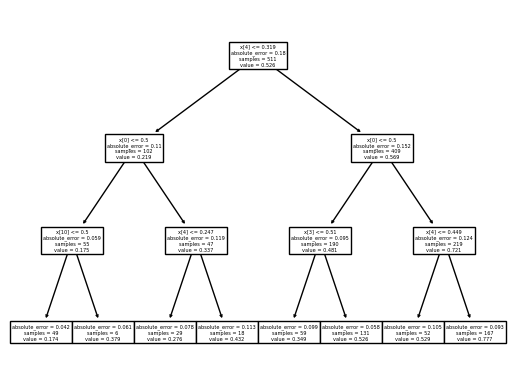

In [ ]:
from sklearn import tree
tree.plot_tree(dtr)
plt.show()

In [ ]:
dtr1=DecisionTreeRegressor(criterion="squared_error",max_depth=3)
dtr1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred1=dtr1.predict(x_test)
y_pred1

array([0.78023089, 0.5102332 , 0.34259139, 0.16869987, 0.78023089,
       0.36646028, 0.16869987, 0.34259139, 0.36646028, 0.34259139,
       0.34259139, 0.55386419, 0.16869987, 0.34227097, 0.5102332 ,
       0.34259139, 0.78023089, 0.16869987, 0.78023089, 0.5102332 ,
       0.34227097, 0.34227097, 0.5102332 , 0.78023089, 0.5102332 ,
       0.5102332 , 0.5102332 , 0.16869987, 0.5102332 , 0.16869987,
       0.34259139, 0.5102332 , 0.16869987, 0.16869987, 0.6554756 ,
       0.5102332 , 0.34227097, 0.5102332 , 0.16869987, 0.78023089,
       0.16869987, 0.55386419, 0.5102332 , 0.78023089, 0.5102332 ,
       0.34259139, 0.78023089, 0.78023089, 0.5102332 , 0.78023089,
       0.34227097, 0.5102332 , 0.55386419, 0.55386419, 0.55386419,
       0.78023089, 0.34227097, 0.78023089, 0.5102332 , 0.5102332 ,
       0.34227097, 0.5102332 , 0.5102332 , 0.5102332 , 0.34227097,
       0.34259139, 0.16869987, 0.78023089, 0.5102332 , 0.16869987,
       0.78023089, 0.55386419, 0.36646028, 0.34259139, 0.78023

In [ ]:
r2_score(y_test,y_pred1)

0.7560614726912234

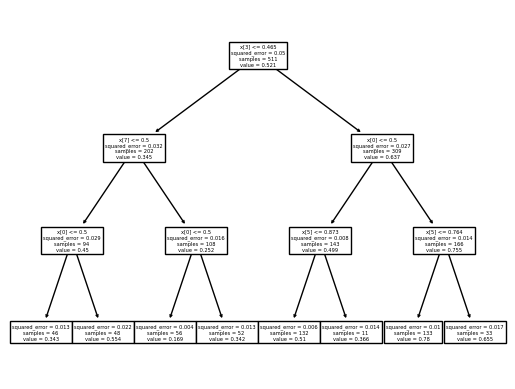

In [ ]:
from sklearn import tree
tree.plot_tree(dtr1)
plt.show()

In [ ]:
dtr2=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)
dtr2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [ ]:
y_pred2=dtr2.predict(x_test)
y_pred2

array([0.78023089, 0.5102332 , 0.34259139, 0.16869987, 0.78023089,
       0.36646028, 0.16869987, 0.34259139, 0.36646028, 0.34259139,
       0.34259139, 0.55386419, 0.16869987, 0.34227097, 0.5102332 ,
       0.34259139, 0.78023089, 0.16869987, 0.78023089, 0.5102332 ,
       0.34227097, 0.34227097, 0.5102332 , 0.78023089, 0.5102332 ,
       0.5102332 , 0.5102332 , 0.16869987, 0.5102332 , 0.16869987,
       0.34259139, 0.5102332 , 0.16869987, 0.16869987, 0.6554756 ,
       0.5102332 , 0.34227097, 0.5102332 , 0.16869987, 0.78023089,
       0.16869987, 0.55386419, 0.5102332 , 0.78023089, 0.5102332 ,
       0.34259139, 0.78023089, 0.78023089, 0.5102332 , 0.78023089,
       0.34227097, 0.5102332 , 0.55386419, 0.55386419, 0.55386419,
       0.78023089, 0.34227097, 0.78023089, 0.5102332 , 0.5102332 ,
       0.34227097, 0.5102332 , 0.5102332 , 0.5102332 , 0.34227097,
       0.34259139, 0.16869987, 0.78023089, 0.5102332 , 0.16869987,
       0.78023089, 0.55386419, 0.36646028, 0.34259139, 0.78023

In [ ]:
r2_score(y_test,y_pred1)

0.7560614726912234

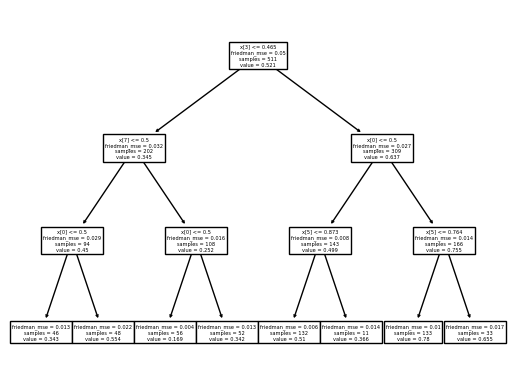

In [ ]:
from sklearn import tree
tree.plot_tree(dtr2)
plt.show()

In [ ]:
## ftting a ridge regresion model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred = ridge.predict(x_test)
y_pred

array([0.70956411, 0.51437624, 0.45151361, 0.19660918, 0.81980571,
       0.54595593, 0.27918934, 0.325966  , 0.38391452, 0.40648232,
       0.37550971, 0.56321765, 0.2652288 , 0.50920787, 0.57935793,
       0.40329035, 0.64739906, 0.16230866, 0.693839  , 0.48471722,
       0.38949114, 0.50484604, 0.58560495, 0.6571078 , 0.57053714,
       0.60047865, 0.4586152 , 0.09382518, 0.52607128, 0.19920212,
       0.39213972, 0.41716242, 0.13086939, 0.1773469 , 0.643219  ,
       0.56776084, 0.34085764, 0.36548574, 0.09120456, 0.85205754,
       0.18740932, 0.62418003, 0.56900401, 0.75745392, 0.4760688 ,
       0.4319638 , 0.7319606 , 0.57807816, 0.51784986, 0.76104728,
       0.49270787, 0.49183779, 0.6380934 , 0.57384609, 0.60358643,
       0.65973793, 0.45603064, 0.70315848, 0.47305514, 0.56844065,
       0.34823751, 0.59510277, 0.47336903, 0.5376508 , 0.416829  ,
       0.25969502, 0.16741155, 0.79256185, 0.30095568, 0.21666351,
       0.72137418, 0.59573626, 0.18111856, 0.28455492, 0.74095

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.008059839602284043


In [ ]:
r2_score(y_test,y_pred)

0.8358932978292324

In [ ]:
## laso regression model fitt
from sklearn.linear_model import Lasso, ElasticNet
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
lasso_pred = lasso.predict(x_test)
lasso_pred

array([0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127

In [ ]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
print('Lasso regression MSE:', lasso_mse)

Lasso regression MSE: 0.0494104839650632


In [ ]:
r2_score(y_test,lasso_pred)

-0.0060487523685031075

In [ ]:
## fitt elasticnet model
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)
enet.fit(x_train, y_train)

ElasticNet(alpha=0.5)

In [ ]:
enet_pred = enet.predict(x_test)
enet_pred

array([0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127831,
       0.52127831, 0.52127831, 0.52127831, 0.52127831, 0.52127

In [ ]:
r2_score(y_test,enet_pred)

-0.0060487523685031075

# SVM using regressor

In [ ]:
# model fitting or building
from sklearn.svm import SVR
model_rbf = SVR(kernel = "rbf",gamma=0.1,C=1.0)
model_rbf

SVR(gamma=0.1)

In [ ]:
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
pred_test_rbf

array([0.71029928, 0.53720627, 0.49198889, 0.16827345, 0.77440653,
       0.50744922, 0.29958865, 0.26442759, 0.44399501, 0.39419221,
       0.37238857, 0.54458738, 0.30673828, 0.50228843, 0.54170035,
       0.39835257, 0.66359609, 0.18553542, 0.70061783, 0.47076057,
       0.3717183 , 0.52434187, 0.57850698, 0.68556491, 0.51506543,
       0.53663209, 0.39842365, 0.16423112, 0.48005037, 0.18155866,
       0.37295453, 0.46038505, 0.14414906, 0.2389774 , 0.64460354,
       0.51611042, 0.35521491, 0.342036  , 0.11654349, 0.89525106,
       0.18939317, 0.6038547 , 0.52812276, 0.77305931, 0.49314349,
       0.39445698, 0.72241449, 0.59688121, 0.50490269, 0.75763682,
       0.52771637, 0.4690591 , 0.53413086, 0.55727394, 0.54581762,
       0.75320574, 0.47991779, 0.69825036, 0.47499361, 0.51176078,
       0.31919954, 0.53545758, 0.4626702 , 0.51396859, 0.3749401 ,
       0.28202399, 0.26391481, 0.83948999, 0.36051032, 0.26672648,
       0.69087784, 0.54185776, 0.21482586, 0.28017423, 0.74131

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test))

0.8893935912289905


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test_rbf)
print('Mean squared error: ', mse)

Mean squared error:  0.007842575423357031


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.08855831651153398
